In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from matplotlib import pyplot as plt
from matplotlib import style


                    Algorithms

In [5]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [6]:
data =pd.read_csv("titanic project.csv")

In [7]:
df = data.copy()

In [8]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,7.8542,NaN,S
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,NaN,S
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
832,833,0,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,NaN,C
158,159,0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S


In [9]:
data.shape

(891, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.drop(["PassengerId","Name","Ticket","Fare"],axis = 1,inplace = True)

                EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Survived', ylabel='count'>

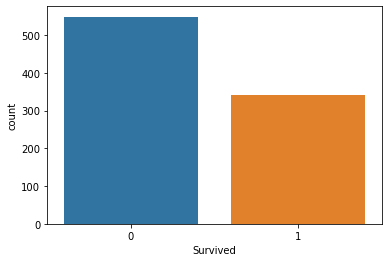

In [16]:
sns.countplot(x = "Survived", data = data)

In [17]:
survived_percent = round(len(data[data["Survived"]==1])/len(data)* 100,2)

In [21]:
print("Percentage of people survived = ", survived_percent,"%")

Percentage of people survived =  38.38 %


<AxesSubplot:xlabel='Pclass', ylabel='count'>

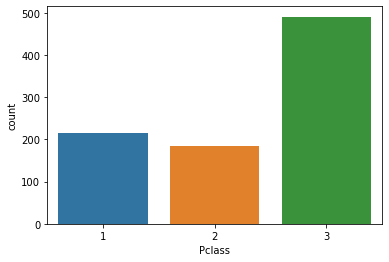

In [22]:
sns.countplot(x = "Pclass",data = data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

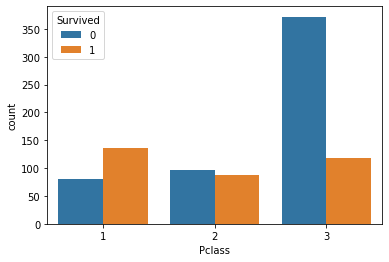

In [24]:
sns.countplot (x = "Pclass", hue = "Survived",data = data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

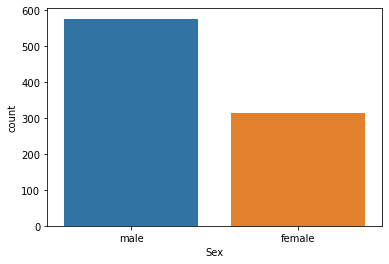

In [25]:
sns.countplot(x = "Sex",data=data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

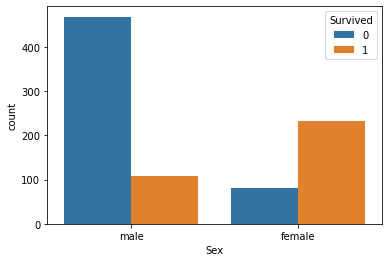

In [26]:
sns.countplot(x= "Sex",hue = "Survived",data =data)

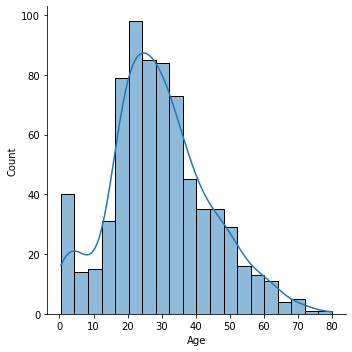

In [30]:
sns.displot(x = 'Age',kde = True, data = data)

In [31]:
print("Age mean=",data["Age"].mean())

Age mean= 29.69911764705882


In [32]:
print('Age median=',data["Age"].median())

Age median= 28.0


In [33]:
df["Age"].fillna(df["Age"].median(skipna = True),inplace=True)

<Figure size 720x720 with 0 Axes>

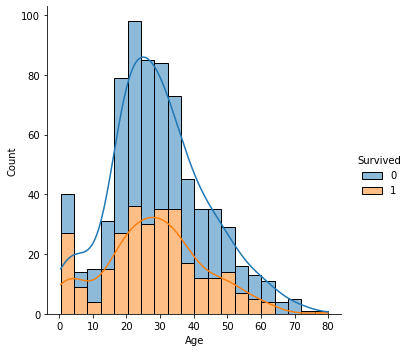

In [36]:
plt.figure(figsize=(10,10))
sns.displot(x = 'Age',hue = 'Survived', kde = True, data = data, multiple = 'stack')

In [37]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

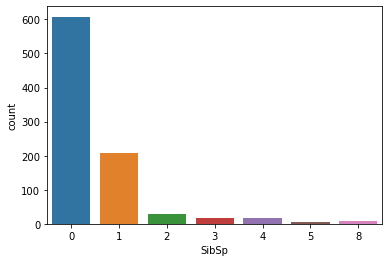

In [38]:
sns.countplot(x = 'SibSp',data = data)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

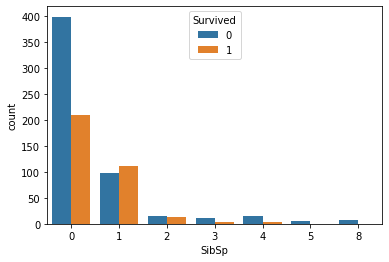

In [39]:
sns.countplot(x = "SibSp",hue="Survived",data = data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

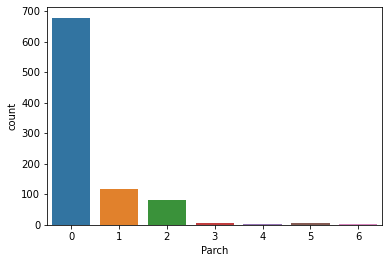

In [40]:
sns.countplot(x = "Parch",data = data)

<AxesSubplot:xlabel='Parch', ylabel='count'>

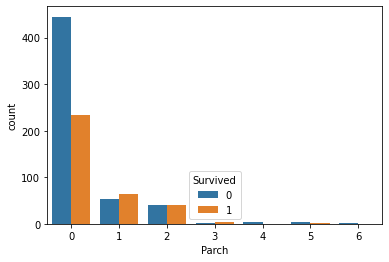

In [41]:
sns.countplot(x = "Parch",hue="Survived",data = data)

In [42]:
data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [43]:
data["Cabin"].value_counts(dropna = False)

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [44]:
df.drop(["Cabin"],axis = 1,inplace = True)

In [45]:
data ["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [47]:
data["Embarked"].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [48]:
df["Embarked"].fillna(df["Embarked"].value_counts().idxmax(),inplace = True)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

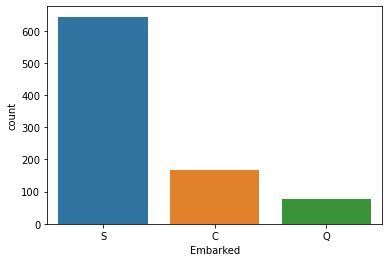

In [49]:
sns.countplot(x = "Embarked",data = data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

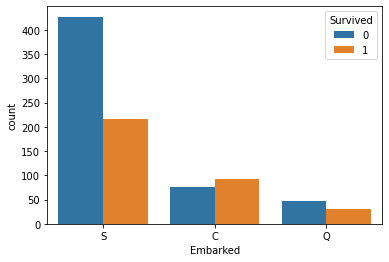

In [50]:
sns.countplot(x = "Embarked",hue = "Survived",data = data)

In [53]:
df["TravelAlone"] = np.where((data["SibSp"]+data["Parch"])>0, 0, 1)

In [54]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,TravelAlone
0,0,3,male,22.0,1,0,S,0
1,1,1,female,38.0,1,0,C,0
2,1,3,female,26.0,0,0,S,1
3,1,1,female,35.0,1,0,S,0
4,0,3,male,35.0,0,0,S,1


<AxesSubplot:xlabel='TravelAlone', ylabel='count'>

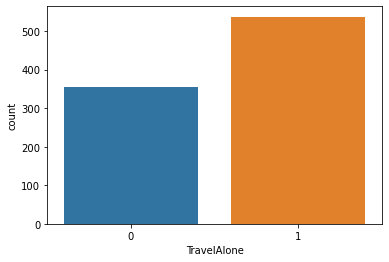

In [56]:
sns.countplot(x = "TravelAlone",data = df)

<AxesSubplot:xlabel='TravelAlone', ylabel='count'>

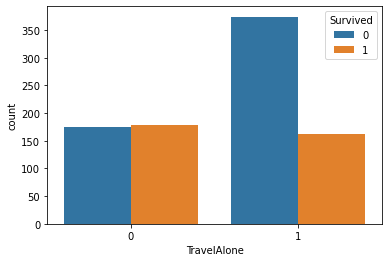

In [61]:
sns.countplot(x = "TravelAlone",hue="Survived",data =df)

In [62]:
df.drop(["Embarked"],axis = 1,inplace = True)

In [63]:
x = df.drop(["Survived"],axis = 1)
y = df["Survived"]

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x["Sex_n"]=le.fit_transform(x["Sex"])

In [65]:
x

,Pclass,Sex,Age,SibSp,Parch,TravelAlone,Sex_n
0,3,male,22.0,1,0,0,1
1,1,female,38.0,1,0,0,0
2,3,female,26.0,0,0,1,0
3,1,female,35.0,1,0,0,0
4,3,male,35.0,0,0,1,1
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,1,1
887,1,female,19.0,0,0,1,0
888,3,female,28.0,1,2,0,0
889,1,male,26.0,0,0,1,1


In [67]:
x.drop(["Sex"],axis = 1,inplace = True)

In [68]:
from sklearn.model_selection import train_test_split


In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [70]:
x_train.shape

(712, 6)

In [71]:
x_test.shape

(179, 6)

In [72]:
y_train.shape

(712,)

In [73]:
y_test.shape

(179,)

In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [75]:
model.fit(x_train,y_train)

LogisticRegression()

In [76]:
model.score(x_test,y_test)

0.8100558659217877

In [77]:
y_pred = model.predict(x_test)

<AxesSubplot:>

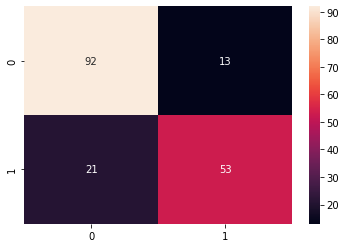

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [84]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)
y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.76 %


In [85]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[408,  36],
       [ 89, 179]], dtype=int64)

In [86]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.8325581395348837
Recall: 0.667910447761194


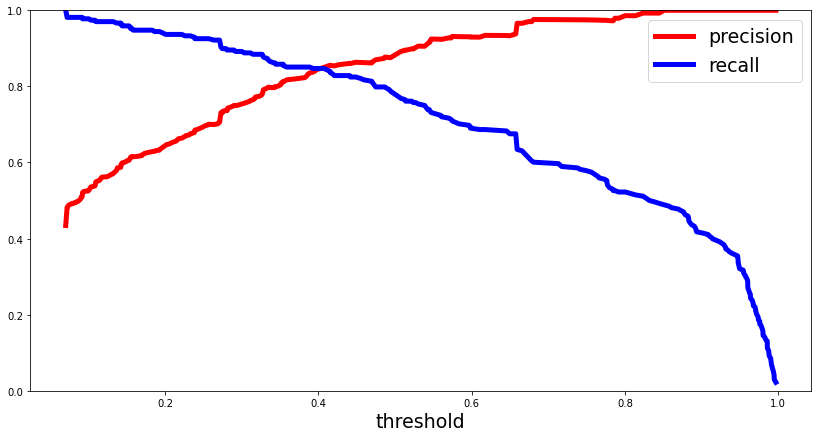

In [89]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

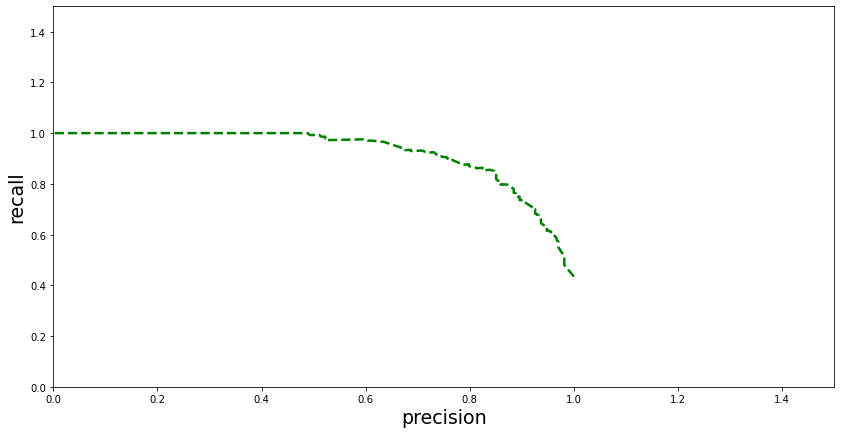

In [90]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

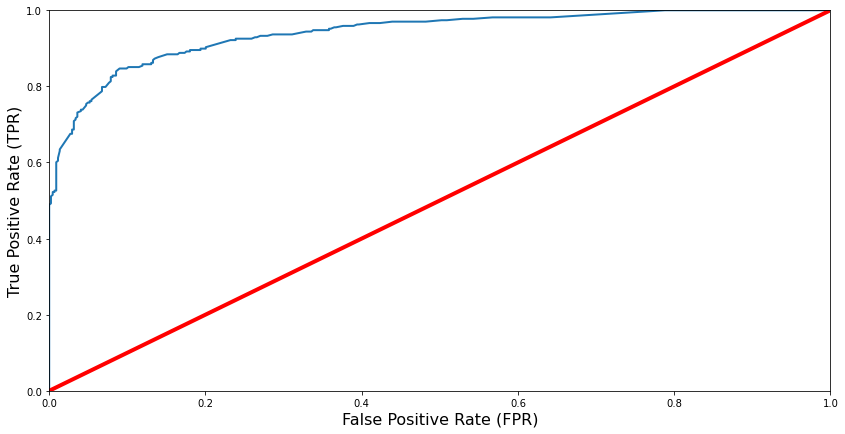

In [91]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [92]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.940911994083636
